In [90]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in Data

In [91]:
# Load the dataframe from the csv file
file_name = "cellpose_results/pred04_240325220507.csv"
df = pd.read_csv(file_name)
display(df[:5])
print(df.shape)
df_orig = df.copy() 

,img_num,prediction type,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,accuracy,image,ground truth,scribbles,prediction
0,0,convpaint,all,0.010,a,101577,94519,18,9,9,196096,0.009179,0.917306,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
1,0,ilastik,all,0.010,a,101577,94519,18,9,9,196096,0.009179,0.929356,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2,0,convpaint,all,0.025,a,101577,94519,40,22,18,196096,0.020398,0.921467,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
3,0,ilastik,all,0.025,a,101577,94519,40,22,18,196096,0.020398,0.906704,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
4,0,convpaint,all,0.050,a,101577,94519,79,38,41,196096,0.040286,0.930753,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...


(7560, 17)


In [111]:
# Load the dataframe from the csv file
file_name = "FoodSeg103_results/FoodSeg03_run02_240411174811.csv"
df = pd.read_csv(file_name)
df = df.loc[(df['prediction type'] == 'ilastik') | (df['prediction type'] == 'convpaint_l-0_s-1-2')]
df['prediction type'] = df['prediction type'].replace({'convpaint_l-0_s-1-2': 'convpaint'})
display(df[:5])
print(df.shape)
df_orig = df.copy()

,img_num,prediction type,scribbles mode,scribbles bin,suffix,max_class_pix_gt,min_class_pix_gt,pix_labelled,max_class_pix_labelled,min_class_pix_labelled,pix_in_img,perc. labelled,accuracy,scribbles,prediction
1,0,convpaint,all,0.05,w3,73227,29097,349,196259,50,196608,0.177511,0.793915,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_convpaint...
8,0,ilastik,all,0.05,w3,73227,29097,349,196259,50,196608,0.177511,0.507690,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_ilastik_a...
11,0,convpaint,all,0.30,w3,73227,29097,2029,194579,367,196608,1.032003,0.868062,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_convpaint...
18,0,ilastik,all,0.30,w3,73227,29097,2029,194579,367,196608,1.032003,0.777003,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_ilastik_a...
21,0,convpaint,all,1.50,w3,73227,29097,10678,185930,1610,196608,5.431112,0.944204,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_convpaint...


(48, 15)


## Check distribution of Convpaint among the dataset

Convpaint

Text(0, 0.5, 'Accuracy')

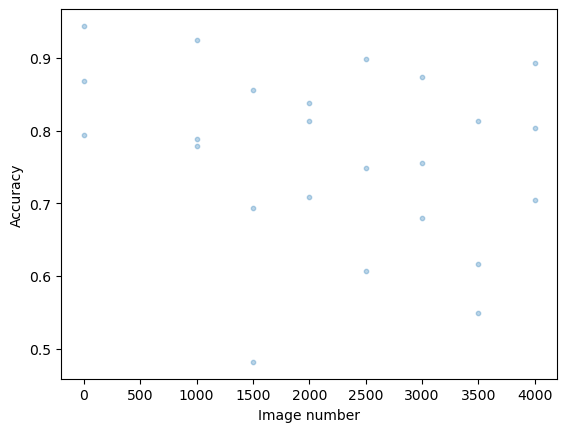

In [112]:
df_conv =  df[df['prediction type'].str.contains('convpaint')]# & (df['scribbles bin'] == 1)]
# plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(df_conv['img_num'], df_conv['accuracy'], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel('Accuracy')

Add column with difference between Convpaint and Ilastik accuracies

In [116]:
df_diff = df.copy()

# Add ilastik accuracy on the same row as convpaint accuracy as a new column ("acc. ilastik")
for scr in df_diff['scribbles']:
    acc_il = df_diff.loc[(df_diff['scribbles'] == scr) & (df_diff['prediction type'] == "ilastik"), "accuracy"].values[0]
    df_diff.loc[(df_diff['scribbles'] == scr) & (df_diff['prediction type'].str.contains("convpaint")), "acc. ilastik"] = acc_il

# Rename the "accuracy" column to "acc. convpaint"
df_diff.rename(columns={"accuracy": "acc. convpaint"}, inplace=True)
# Add difference between convpaint and ilastik accuracy in a new column ("acc. diff")
df_diff["acc. diff"] = df_diff["acc. convpaint"] - df_diff["acc. ilastik"]

# Move the columns (optional, and needs exactly these column names)
# df_diff = df_diff[["img_num", "scribbles mode", "scribbles bin", "suffix", "class_1_pix_gt", "class_2_pix_gt", "pix_labelled", "class_1_pix_labelled", "class_2_pix_labelled", "pix_in_img", "perc. labelled", "acc. convpaint", "acc. ilastik", "acc. diff", "image", "ground truth", "scribbles"]]

# Remove Ilastik rows
df_diff = df_diff[df_diff["prediction type"].str.contains("convpaint")]

Text(0, 0.5, 'Accuracy diff.')

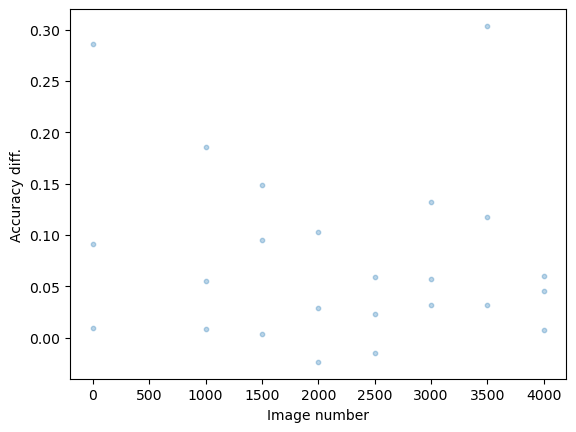

In [117]:
plt.scatter(x = df_diff['img_num'], y = df_diff['acc. diff'], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel('Accuracy diff.')

## Compare convpaint to ilastik (accuracies)

Check if there is a correlation between pixels labelled - mostly makes sense to check within bins...

In [118]:
# df_diff_bin = df_diff[df_diff["scribbles bin"] == 1]
df_diff_bin = df_diff[df_diff["scribbles bin"] == 0.05]

In one or the other class (note: not working for FoodSeg103 with multiple classes)

In [97]:
# plt.figure(figsize=(10, 5), dpi=100)
# plt.scatter(df_diff_bin["class_1_pix_labelled"], df_diff_bin["acc. diff"], alpha=0.3, s=10, c="red", label="background")
# plt.scatter(df_diff_bin["class_2_pix_labelled"], df_diff_bin["acc. diff"], alpha=0.3, s=10, c = "blue", label="foreground")
# plt.xlabel("Number of labelled pixels")
# plt.xscale("log")
# plt.hlines(0, 0, np.max([np.max(df_diff_bin["class_1_pix_labelled"]), np.max(df_diff_bin["class_1_pix_labelled"])]), colors='grey', linestyles='dashed')
# plt.ylabel("Accuracy difference (convpaint - ilastik)")
# plt.legend()

In the minimum/maximum among classes

Text(0, 0.5, 'Accuracy difference (convpaint - ilastik)')

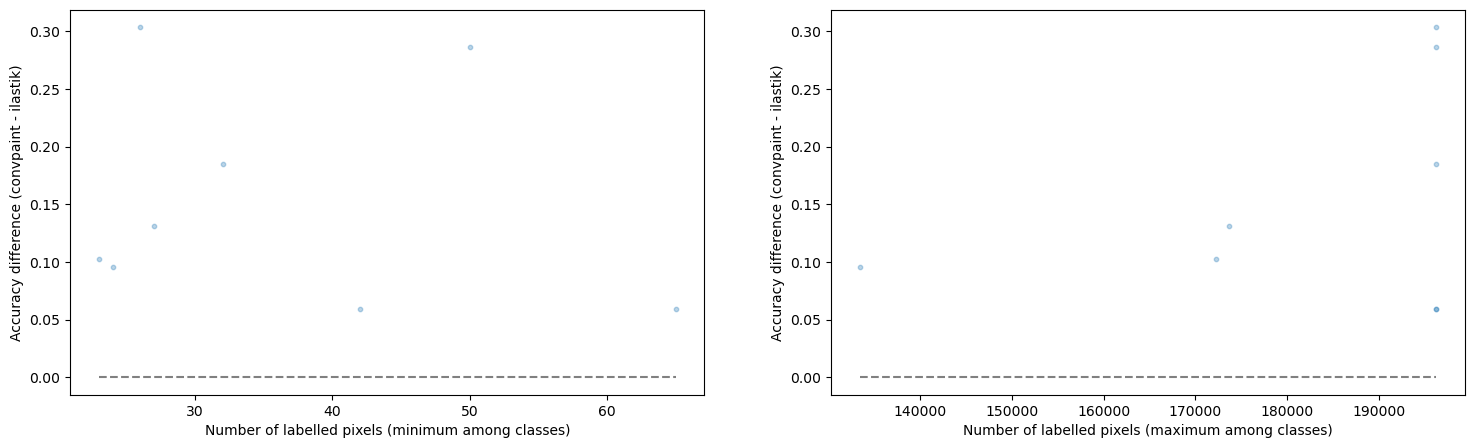

In [119]:
# df_diff_bin.loc[:,'min_class_pix_labelled'] = df_diff_bin[['class_1_pix_labelled', 'class_2_pix_labelled']].min(axis=1)#.astype(int)
# df_diff_bin.loc[:,'max_class_pix_labelled'] = df_diff_bin[['class_1_pix_labelled', 'class_2_pix_labelled']].max(axis=1)#.astype(int)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), dpi=100)
ax1.scatter(x = df_diff_bin['min_class_pix_labelled'], y = df_diff_bin['acc. diff'], alpha=0.3, s=10)
ax1.set_xlabel("Number of labelled pixels (minimum among classes)")
# ax1.set_xscale("log")
ax1.hlines(0, np.min(df_diff_bin['min_class_pix_labelled']), np.max(df_diff_bin['min_class_pix_labelled']), colors='grey', linestyles='dashed')
ax1.set_ylabel("Accuracy difference (convpaint - ilastik)")
ax2.scatter(x = df_diff_bin['max_class_pix_labelled'], y = df_diff_bin['acc. diff'], alpha=0.3, s=10)
ax2.set_xlabel("Number of labelled pixels (maximum among classes)")
# ax2.set_xscale("log")
ax2.hlines(0, np.min(df_diff_bin['max_class_pix_labelled']), np.max(df_diff_bin['max_class_pix_labelled']), colors='grey', linestyles='dashed')
ax2.set_ylabel("Accuracy difference (convpaint - ilastik)")

Check if there is a correlation with the resolution (number pixels) of the image

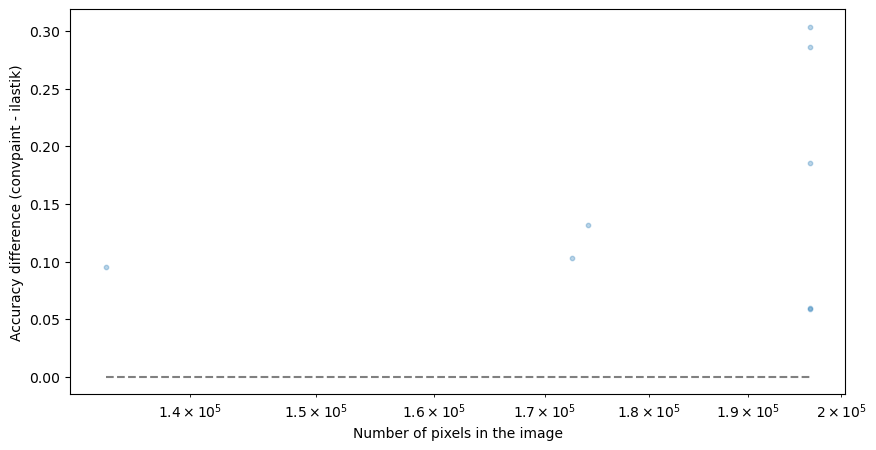

In [120]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df_diff_bin["pix_in_img"], df_diff_bin["acc. diff"], alpha=0.3, s=10)
plt.xlabel("Number of pixels in the image")
plt.ylabel("Accuracy difference (convpaint - ilastik)")
plt.hlines(0, np.min(df_diff_bin["pix_in_img"]), np.max(df_diff_bin["pix_in_img"]), colors='grey', linestyles='dashed')
plt.xscale("log")

Check in which cases the difference is the highest

In [121]:
# df_diff[df_diff['acc. convpaint'] < 0.6].sort_values(by="acc. diff", ascending=True)['image'].shape
df_diff[df_diff['scribbles bin'] > 0].sort_values(by="acc. diff", ascending=True)[0:10]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,max_class_pix_gt,min_class_pix_gt,pix_labelled,max_class_pix_labelled,min_class_pix_labelled,pix_in_img,perc. labelled,acc. convpaint,scribbles,prediction,acc. ilastik,acc. diff
111,2000,convpaint,all,1.5,w3,65459,9910,9421,163123,560,172544,5.460057,0.838186,./FoodSeg103_results/data/run02/2000_scribbles...,./FoodSeg103_results/data/run02/2000_convpaint...,0.861937,-0.023750
141,2500,convpaint,all,1.5,w3,123607,16487,9792,186816,760,196608,4.980469,0.898209,./FoodSeg103_results/data/run02/2500_scribbles...,./FoodSeg103_results/data/run02/2500_convpaint...,0.912928,-0.014720
81,1500,convpaint,all,1.5,w3,77608,4269,7084,126576,229,133660,5.300015,0.856531,./FoodSeg103_results/data/run02/1500_scribbles...,./FoodSeg103_results/data/run02/1500_convpaint...,0.853397,0.003135
221,4000,convpaint,all,0.3,w3,86011,27030,1999,194609,301,196608,1.016744,0.803126,./FoodSeg103_results/data/run02/4000_scribbles...,./FoodSeg103_results/data/run02/4000_convpaint...,0.795781,0.007345
51,1000,convpaint,all,1.5,w3,54705,17296,10292,186316,817,196608,5.234782,0.924357,./FoodSeg103_results/data/run02/1000_scribbles...,./FoodSeg103_results/data/run02/1000_convpaint...,0.915827,0.008530
21,0,convpaint,all,1.5,w3,73227,29097,10678,185930,1610,196608,5.431112,0.944204,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_convpaint...,0.934657,0.009547
131,2500,convpaint,all,0.3,w3,123607,16487,1947,194661,166,196608,0.990295,0.748306,./FoodSeg103_results/data/run02/2500_scribbles...,./FoodSeg103_results/data/run02/2500_convpaint...,0.725525,0.022781
101,2000,convpaint,all,0.3,w3,65459,9910,1706,170838,101,172544,0.988733,0.813288,./FoodSeg103_results/data/run02/2000_scribbles...,./FoodSeg103_results/data/run02/2000_convpaint...,0.784356,0.028932
171,3000,convpaint,all,1.5,w3,104975,6515,9252,164828,283,174080,5.314798,0.874460,./FoodSeg103_results/data/run02/3000_scribbles...,./FoodSeg103_results/data/run02/3000_convpaint...,0.842796,0.031664
201,3500,convpaint,all,1.5,w3,63534,17879,10813,185795,901,196608,5.499776,0.813807,./FoodSeg103_results/data/run02/3500_scribbles...,./FoodSeg103_results/data/run02/3500_convpaint...,0.781896,0.031911


## Compare bins

In [122]:
df_diff_copy = df_diff.copy()

### Convpaint-Ilastik difference

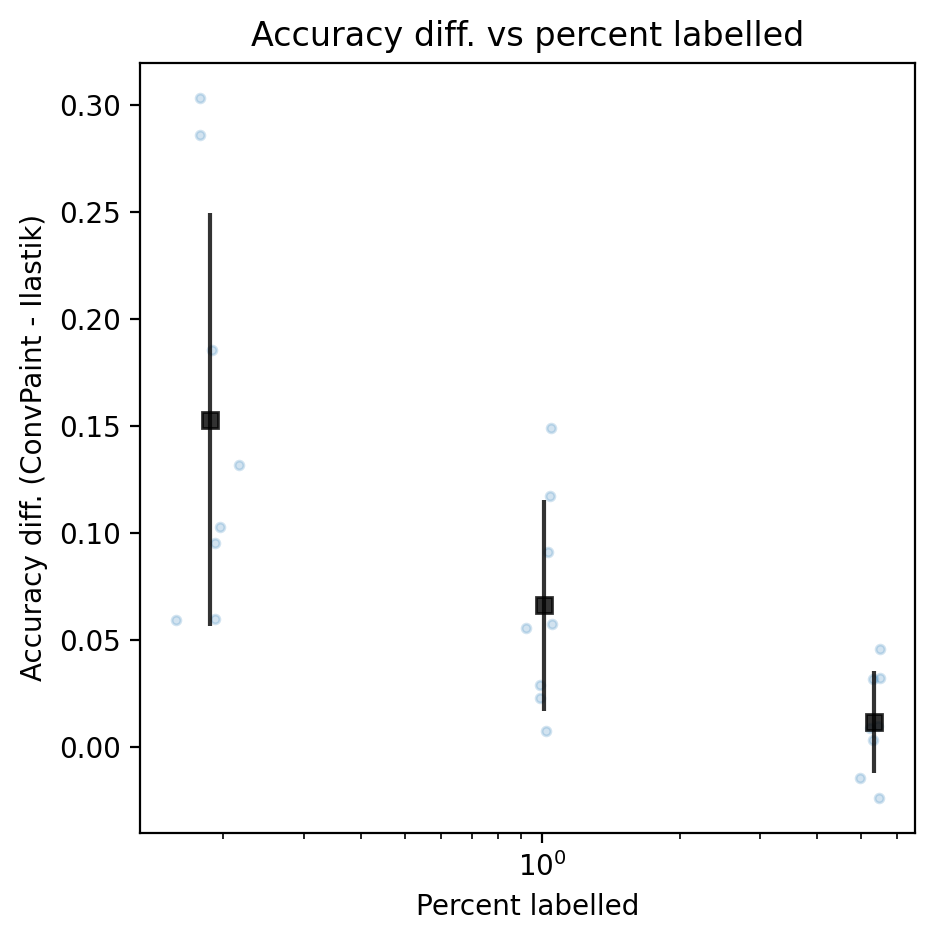

In [102]:
# Plot the data in matplotlib scatter plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)
# # set dpi
fig.set_dpi(200)

# scatter_ax = ax[0]
# sns.scatterplot(x="acc. convpaint", y="acc. ilastik", hue="scribbles bin", data=df_diff_copy, palette="viridis", s=30, alpha=0.8, ax=scatter_ax, legend=False, marker='.')
# # scatter_ax.scatter(df_diff_copy['acc. convpaint'], df_diff_copy['acc. ilastik'], c=df_diff_copy['scribbles bin'], cmap='viridis', s=20, alpha=0.7)
# scatter_ax.plot([0, 1], [0, 1], transform=scatter_ax.transAxes, c='black', alpha=0.5)
# scatter_ax.set_xlabel("Accuracy ConvPaint")
# scatter_ax.set_ylabel("Accuracy Ilastik")
# scatter_ax.set_title("Accuracy ConvPaint vs Accuracy Ilastik")

diff_ax = ax
diff_ax.scatter(df_diff_copy['perc. labelled'], df_diff_copy['acc. diff'], alpha=0.2, s=10)
df_grouped = df_diff_copy.groupby('scribbles bin').agg({'acc. diff': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
diff_ax.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['acc. diff']['mean'], yerr=df_grouped['acc. diff']['std'], fmt='s', c='black', alpha=0.8)
diff_ax.set_xscale('log')
diff_ax.set_xlabel('Percent labelled')
diff_ax.set_ylabel('Accuracy diff. (ConvPaint - Ilastik)')
diff_ax.set_title(f'Accuracy diff. vs percent labelled')
plt.show()

### Convpaint and Ilastik on separate plots

In [124]:
# Filter out some bins
# df = df[df['scribbles bin'] != 0.01]
# df = df[df['scribbles bin'] != 1]
# df = df[df['class_1_pix_labelled'] >= 5]
# df = df[df['class_2_pix_labelled'] >= 5]
# Change the values of the prediction types to be more readable
# df['prediction type'] = df['prediction type'].apply(lambda x: "convpaint" if x == "convpaintCh1" else "classic filters")

# Create two filtered dataframes
df['prediction type'] = df['prediction type'].apply(lambda x: "classic filters" if x == "ilastik" else x)
df_convpaint = df[df['prediction type'].str.contains('convpaint')]
df_ilastik = df[df['prediction type'].str.contains('classic filters')]
# df[:5]

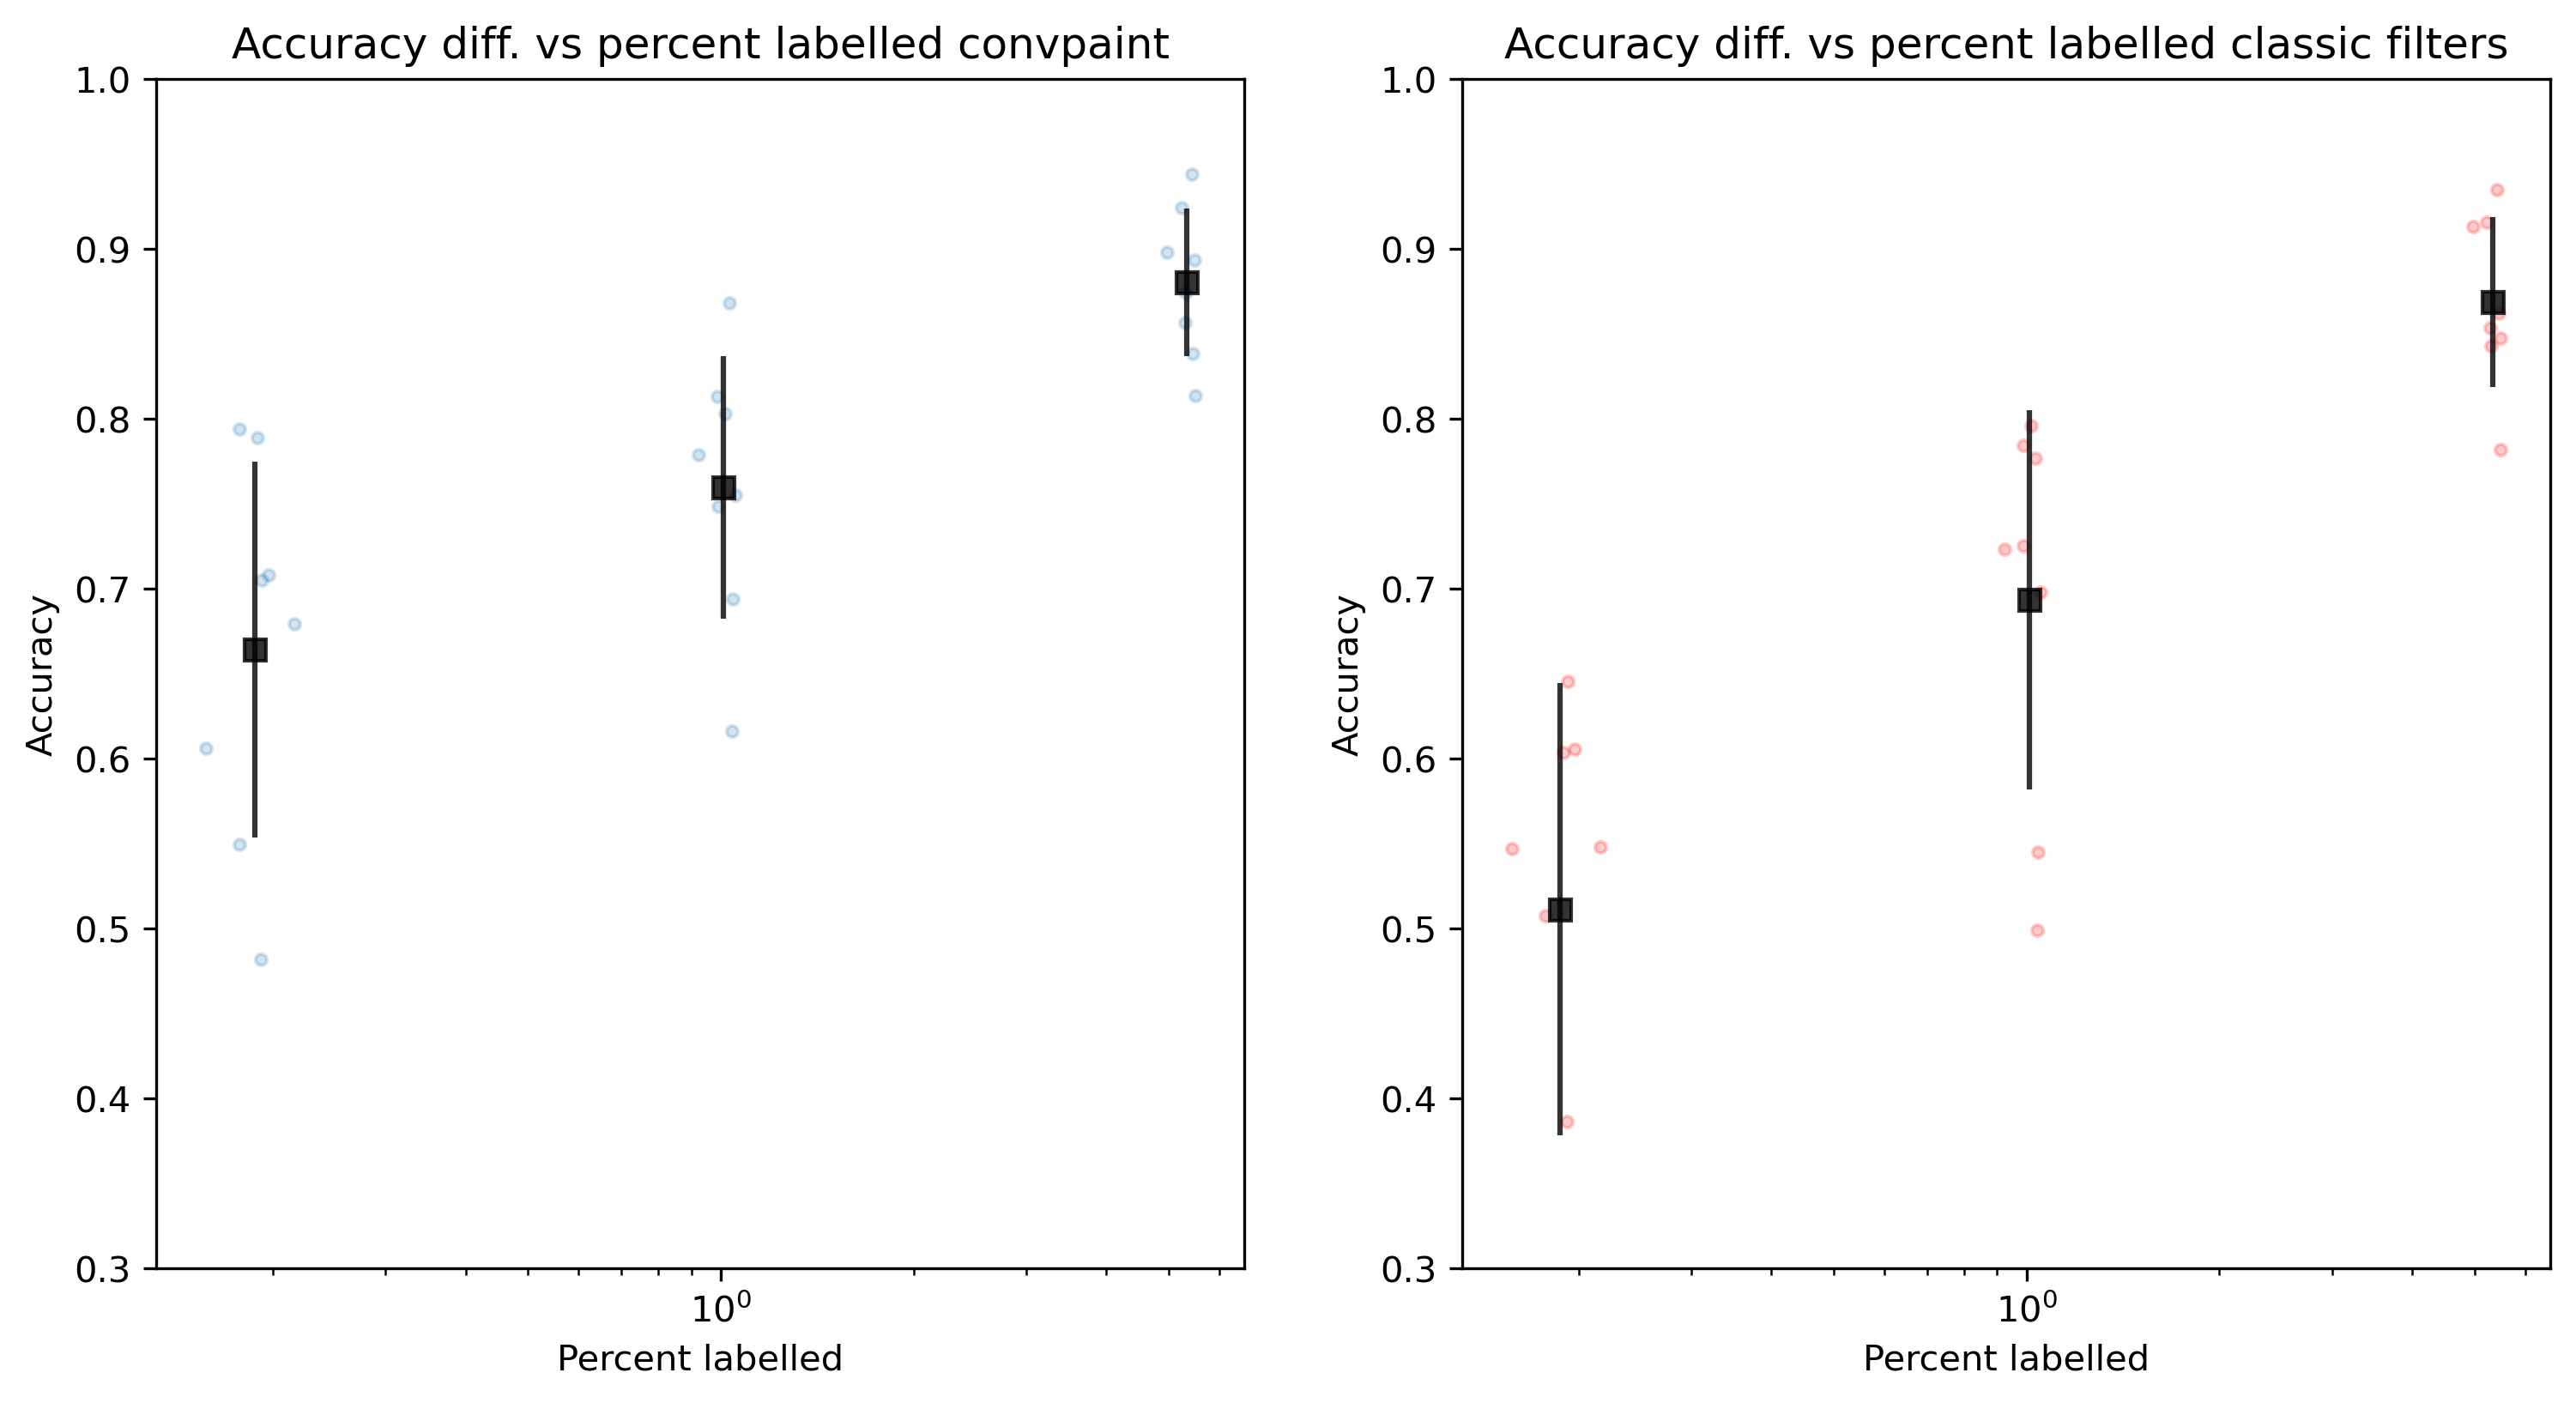

In [125]:
def plot_accuracy_vs_perc_labelled(df, pred_to_show="convpaint", plt_ax=None, **kwargs):
    if plt_ax is None:
        plt_ax = plt.subplots(1, 1)[1]
    # Plot accuracy vs percent labelled
    df_filtered = df[df['prediction type'].str.contains(pred_to_show)]

    # Scatterplot
    plt_ax.scatter(df_filtered['perc. labelled'], df_filtered['accuracy'], alpha=0.2, s=10, **kwargs)

    # Grouped plot
    df_grouped = df_filtered.groupby('scribbles bin').agg({'accuracy': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
    plt_ax.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='black', alpha=0.8)
    plt_ax.set_xscale('log')
    plt_ax.set_ylim(0.3, 1)
    # plt_ax.set_xticks([0.05, 0.1, 1])
    plt_ax.set_xlabel('Percent labelled')
    plt_ax.set_ylabel('Accuracy')
    plt_ax.set_title(f'Accuracy diff. vs percent labelled {pred_to_show}')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.set_dpi(300)
plot_accuracy_vs_perc_labelled(df, 'convpaint', plt_ax=ax[0])
plot_accuracy_vs_perc_labelled(df, 'classic filters', plt_ax=ax[1], c='red')
# plt.savefig('results/accuracy_vs_perc_labelled.pdf', dpi=300)
plt.show()


### Convpaint and Ilastik on same plot

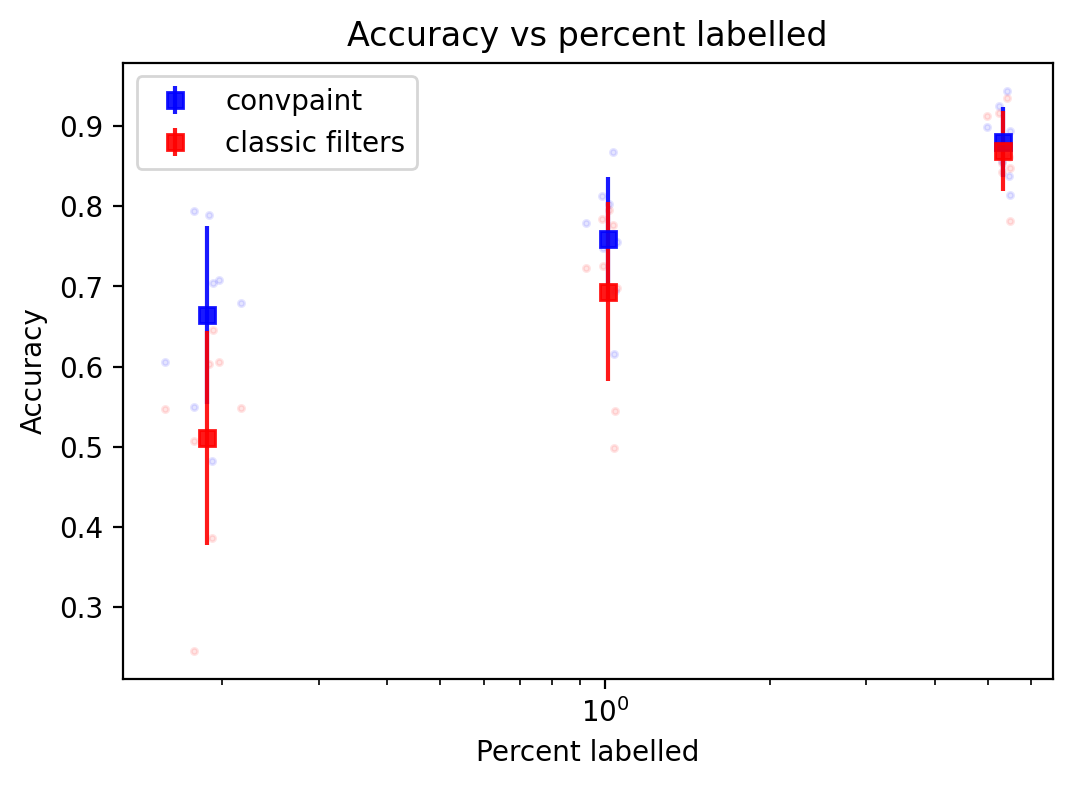

In [127]:
# Plot accuracy vs percent labelled
plt.figure(figsize=(6,4),dpi=200)

# ADD CONVPAINT PLOT
# Scatterplot
plt.scatter(df_convpaint['perc. labelled'], df_convpaint['accuracy'], alpha=0.1, s=5, c='blue')
# Grouped plot
df_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='blue', alpha=0.9, label='convpaint')
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='blue', alpha=0.9)

# ADD ILASTIK PLOT
# Scatterplot
plt.scatter(df_ilastik['perc. labelled'], df_ilastik['accuracy'], alpha=0.1, s=5, c='red')
# Grouped plot
df_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='red', alpha=0.9, label='classic filters')
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='red', alpha=0.9)

# ADJUST PARAMETERS
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.legend()
plt.show()

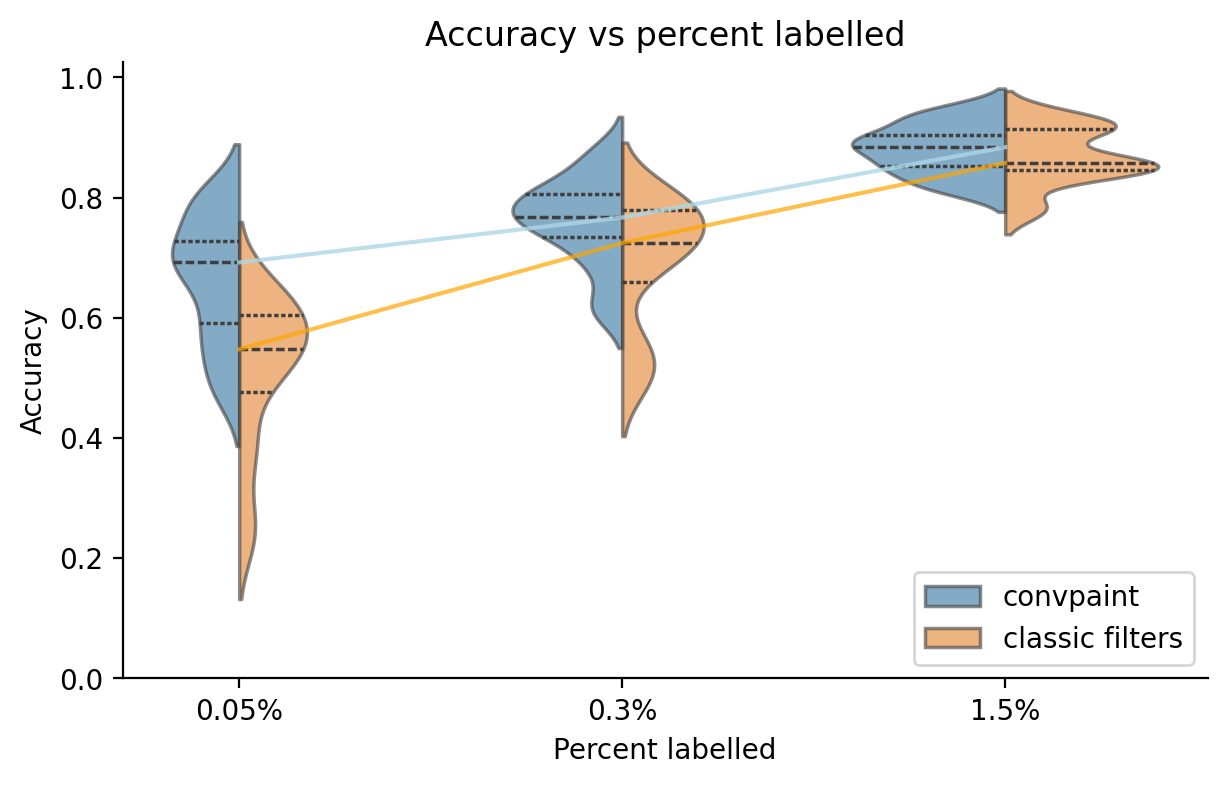

In [128]:
# Add a [0,0] point to the grouped dataframes manually
# df_convpaint_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_convpaint_grouped], ignore_index=True)
# df_ilastik_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_ilastik_grouped], ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'convpaint'}, ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'classic filters'}, ignore_index=True)

plt.figure(figsize=(7, 4), dpi=200)

# Plot violin plot with seaborn split the violin between convpaint and ilastik
# Create the violin plot
ax = sns.violinplot(x='scribbles bin', y='accuracy', data=df, hue='prediction type', split=True, alpha=0.6, inner="quart", bw_adjust=0.65)

# Create line plot
# Group the bins
df_convpaint_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
df_ilastik_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
# Plot the means of each bin and connect them with a line
x_positions = ax.get_xticks()
plt.plot(x_positions, df_convpaint_grouped['accuracy'], color='lightblue', alpha=0.8)
plt.plot(x_positions, df_ilastik_grouped['accuracy'], color='orange', alpha=0.7)

# Set some parameters
x_labels = [f"{x}%" for x in df_convpaint_grouped['scribbles bin']]
plt.ylim(0, 1.025)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x_positions, x_labels)
plt.legend(loc='lower right')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')

# Show or save the plot
plt.show()
# plt.savefig("convpaint-vs-ilastik_acc-vs-lab.svg", format='svg')

# Compare VGG16 models

Cellpose data

In [130]:
file_name001 = "cellpose_results/pred05_run02_240328182009.csv"
file_name010 = "cellpose_results/pred05_run03_240403104745.csv"
file_name100 = "cellpose_results/pred06_240403221657.csv"
df001 = pd.read_csv(file_name001)
df010 = pd.read_csv(file_name010)
df100 = pd.read_csv(file_name100)
# Extract layers and scalings
for df in [df001, df010, df100]:
    df['layers'] = df['prediction type'].str.extract(r'l-(\d+-?\d*)')
    df['scalings'] = df['prediction type'].str.extract(r's-(\d+-?\d*-?\d*-?\d*)')
    # df[:5]

FoodSeg103 data

In [139]:
food_df = pd.read_csv("FoodSeg103_results/FoodSeg03_run02_240411174811.csv")
food_df['layers'] = food_df['prediction type'].str.extract(r'l-(\d+-?\d*)')
food_df['scalings'] = food_df['prediction type'].str.extract(r's-(\d+-?\d*-?\d*-?\d*)')

food_df1 = food_df[food_df['scribbles bin'] == 0.05]
food_df2 = food_df[food_df['scribbles bin'] == 0.3]
food_df3 = food_df[food_df['scribbles bin'] == 1.5]
food_dfs = [food_df1, food_df2, food_df3]
food_annot_bins = [round(df['perc. labelled'].mean(), 1) for df in food_dfs]

food_df1_convpaint = food_df1[food_df1['prediction type'].str.contains('convpaint')]
food_df2_convpaint = food_df2[food_df2['prediction type'].str.contains('convpaint')]
food_df3_convpaint = food_df3[food_df3['prediction type'].str.contains('convpaint')]
food_df1_ilastik = food_df1[food_df1['prediction type'].str.contains('ilastik')]
food_df2_ilastik = food_df2[food_df2['prediction type'].str.contains('ilastik')]
food_df3_ilastik = food_df3[food_df3['prediction type'].str.contains('ilastik')]
food_df1_dino = food_df1[food_df1['prediction type'].str.contains('dino')]
food_df2_dino = food_df2[food_df2['prediction type'].str.contains('dino')]
food_df3_dino = food_df3[food_df3['prediction type'].str.contains('dino')]

food_df_list_conv = [food_df1_convpaint, food_df2_convpaint, food_df3_convpaint]
food_df_list_ilastik = [food_df1_ilastik, food_df2_ilastik, food_df3_ilastik]
food_df_list_dino = [food_df1_dino, food_df2_dino, food_df3_dino]

In [ ]:
food_df1_dino[0:15]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,max_class_pix_gt,min_class_pix_gt,pix_labelled,max_class_pix_labelled,min_class_pix_labelled,pix_in_img,perc. labelled,accuracy,scribbles,prediction,layers,scalings
9,0,dino,all,0.05,w3,73227,29097,349,196259,50,196608,0.177511,0.836177,./FoodSeg103_results/data/run02/0000_scribbles...,./FoodSeg103_results/data/run02/0000_dino_all_...,NaN,NaN
39,1000,dino,all,0.05,w3,54705,17296,372,196236,32,196608,0.189209,0.928680,./FoodSeg103_results/data/run02/1000_scribbles...,./FoodSeg103_results/data/run02/1000_dino_all_...,NaN,NaN
69,1500,dino,all,0.05,w3,77608,4269,256,133404,24,133660,0.191531,0.939032,./FoodSeg103_results/data/run02/1500_scribbles...,./FoodSeg103_results/data/run02/1500_dino_all_...,NaN,NaN
99,2000,dino,all,0.05,w3,65459,9910,340,172204,23,172544,0.197051,0.942936,./FoodSeg103_results/data/run02/2000_scribbles...,./FoodSeg103_results/data/run02/2000_dino_all_...,NaN,NaN
129,2500,dino,all,0.05,w3,123607,16487,309,196299,42,196608,0.157166,0.966466,./FoodSeg103_results/data/run02/2500_scribbles...,./FoodSeg103_results/data/run02/2500_dino_all_...,NaN,NaN
159,3000,dino,all,0.05,w3,104975,6515,376,173704,27,174080,0.215993,0.916337,./FoodSeg103_results/data/run02/3000_scribbles...,./FoodSeg103_results/data/run02/3000_dino_all_...,NaN,NaN
189,3500,dino,all,0.05,w3,63534,17879,349,196259,26,196608,0.177511,0.574259,./FoodSeg103_results/data/run02/3500_scribbles...,./FoodSeg103_results/data/run02/3500_dino_all_...,NaN,NaN
219,4000,dino,all,0.05,w3,86011,27030,378,196230,65,196608,0.192261,0.926336,./FoodSeg103_results/data/run02/4000_scribbles...,./FoodSeg103_results/data/run02/4000_dino_all_...,NaN,NaN


## Just Convpaint

Define what data to use

In [140]:
title_list = food_annot_bins #[0.1, 1, 10]
df_list = food_df_list_conv #[df001, df010, df100]
num_df = len(df_list)

Plot accuracies for different Convpaint models (layers and scalings)

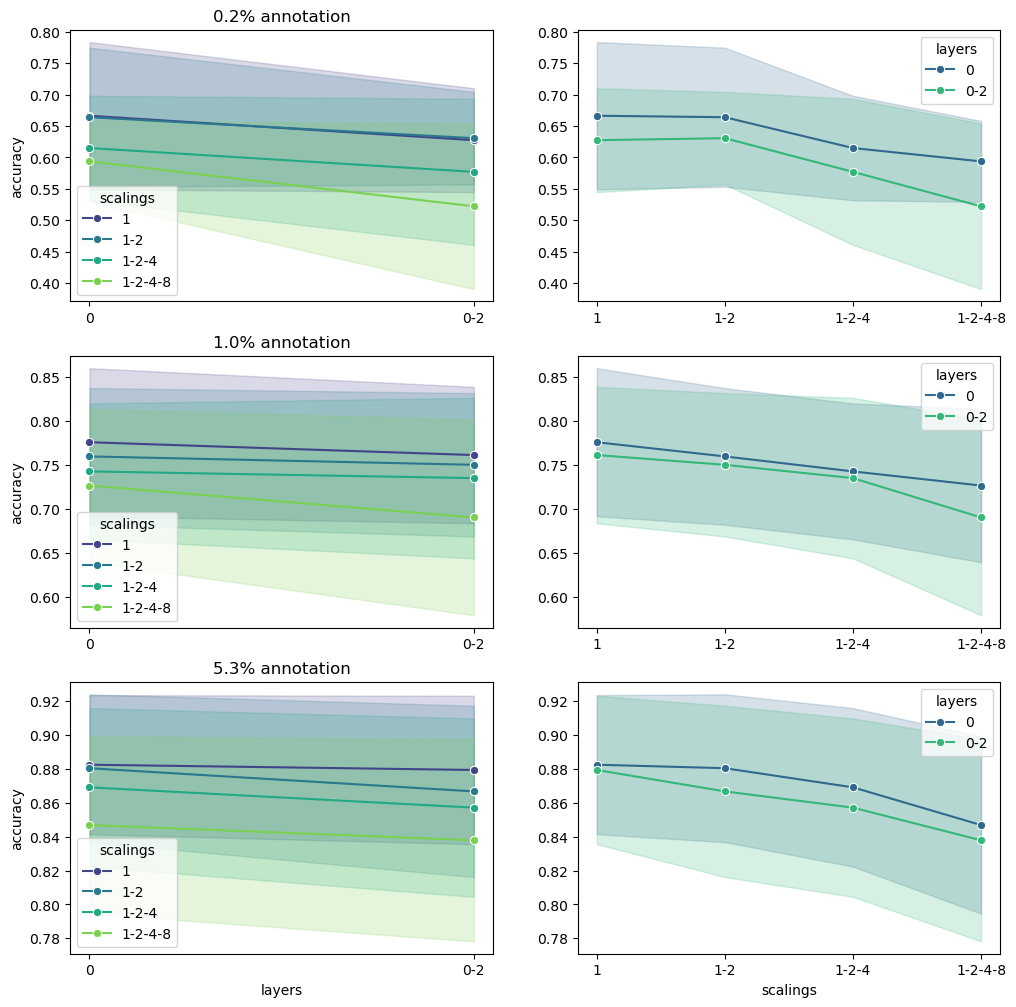

In [141]:
fig, ax = plt.subplots(3, 2)

fig.set_size_inches(12, 12)
fig.set_dpi(100)

for i, df in enumerate(df_list):
    row = ax[i]
    sns.lineplot(x='layers', y='accuracy', data=df, hue='scalings', palette='viridis', errorbar='sd', marker='o',ax=row[0])
    sns.lineplot(x='scalings', y='accuracy', data=df, hue='layers', palette='viridis', errorbar='sd', marker='o',ax=row[1])
    # Hide y axis label of right plot
    row[0].title.set_text(f"{title_list[i]}% annotation")
    row[1].set_ylabel('')
    if i != num_df-1:
        row[0].set_xlabel('')
        row[1].set_xlabel('')

Create a heatmap with the different Convpaint models (layers and scalings)

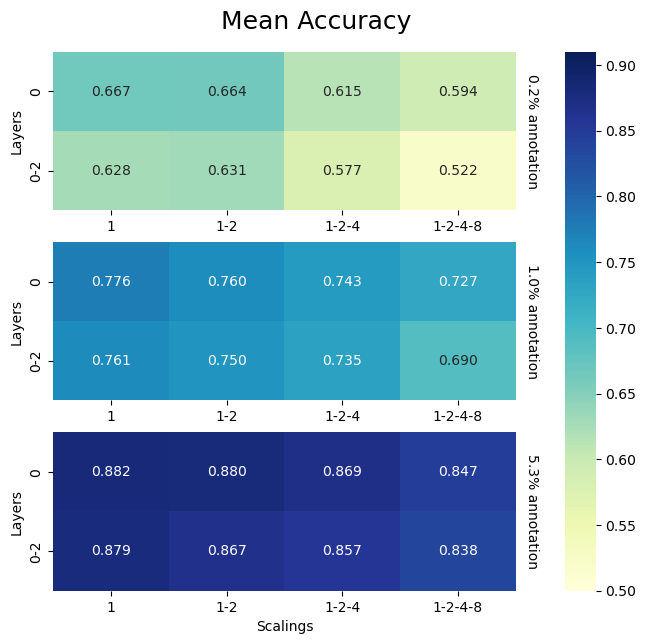

In [142]:
# fig, ax = plt.subplots(3, 1, gridspec_kw={'width_ratios': [15], 'height_ratios': [1, 0.15, 1]})
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                              ['mid left', 'right'],
                              ['lower left', 'right']],
                              gridspec_kw={'width_ratios': [15, 1]})
ax_list = [ax['upper left'], ax['mid left'], ax['lower left']]
fig.set_size_inches(7, 7)
fig.set_dpi(100)
fig.suptitle('Mean Accuracy', fontsize=18, y=0.94)
# fig.tight_layout()

for i, df in enumerate(df_list):
    row = ax_list[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values='accuracy')

    sns.heatmap(heatmap_df_mean, annot=True, cmap="YlGnBu", fmt=".3f", cbar=i==0, cbar_ax=ax['right'], ax=row, vmin=0.5, vmax=0.91)
    # row.set_title(f'{["0.1", "1.0"][i]}% annotation')
    row.text(1.02, 0.5, f'{title_list[i]}% annotation', transform=row.transAxes, rotation=270, va='center')
    row.set_xlabel('Scalings' if i == num_df - 1 else '')
    row.set_ylabel('Layers')

    # row.set_tight_layout()
    # row.set_aspect('auto')

# plt.savefig('results/avg_acc.pdf', dpi=300)



### Convpaint models vs. Ilastik (and DINOv2) on same set of data

Extract Ilastik data for cellpose

In [135]:
pred04_010 = df_orig.loc[(df_orig['scribbles bin'] == 1) & (df_orig['img_num'].isin(range(0, 540, 10)))]
pred04_001 = df_orig[(df_orig['scribbles bin'] == 0.1) & (df_orig['img_num'].isin(range(0, 540, 10)))]
# pred04_001 = df_orig[(df_orig['scribbles bin'] == 0.01) & (df_orig['img_num'].isin(range(0, 540, 10)))]

# Prove that the two test runs (pred04 with all images but only default convpaint and pred05/df010 with convpaint comparison) gave the same results
print(f"pred04 {pred04_010[pred04_010['prediction type'] == 'convpaint']['accuracy'].mean():.3f} = pred05 {df010[df010['prediction type']=='convpaint_l-0_s-1-2']['accuracy'].mean():.3f}")
print(f"pred04 {pred04_001[pred04_001['prediction type'] == 'convpaint']['accuracy'].mean():.3f} = pred05 {df001[df001['prediction type']=='convpaint_l-0_s-1-2']['accuracy'].mean():.3f}")

pred04 nan = pred05 0.896
pred04 nan = pred05 0.871


In [137]:
# Extract Ilastik results for the equivalent cases
ilastik_010 = pred04_010[pred04_010['prediction type']=='ilastik']
ilastik_001 = pred04_001[pred04_001['prediction type']=='ilastik']
ilastik_100 =  pd.read_csv("cellpose_results/pred07_240408151643.csv")
print(f"Ilastik mean accuracy for 0.1% scribbles and every 10th image: {ilastik_001['accuracy'].mean():.3f}")
print(f"Ilastik mean accuracy for 1% scribbles and every 10th image: {ilastik_010['accuracy'].mean():.3f}")
print(f"Ilastik mean accuracy for 10% scribbles and every 10th image: {ilastik_100['accuracy'].mean():.3f}")
# Do the same for Convpaint to ensure that the results are the same
# convpaint_001 = pred04_001[pred04_001['prediction type']=='convpaint']
# convpaint_010 = pred04_010[pred04_010['prediction type']=='convpaint']
# convpaint_100 =  pd.read_csv("results/pred06_240403221657.csv")
# print(f"ConvPaint mean accuracy for 0.1% scribbles and every 10th image: {convpaint_001['accuracy'].mean():.3f}")
# print(f"ConvPaint mean accuracy for 1% scribbles and every 10th image: {convpaint_010['accuracy'].mean():.3f}")
# print(f"ConvPaint mean accuracy for 10% scribbles and every 10th image: {df100['accuracy'].mean():.3f}")

Ilastik mean accuracy for 0.1% scribbles and every 10th image: nan
Ilastik mean accuracy for 1% scribbles and every 10th image: nan
Ilastik mean accuracy for 10% scribbles and every 10th image: 0.911


Define what data to use

In [144]:
title_list = food_annot_bins #[0.1, 1, 10]
df_list_conv = food_df_list_conv #[df001, df010, df100]
df_list_ila = food_df_list_ilastik #[ilastik_001, ilastik_010, ilastik_100]
df_list_dino = food_df_list_dino
num_df = len(df_list_conv)

Create Heatmap

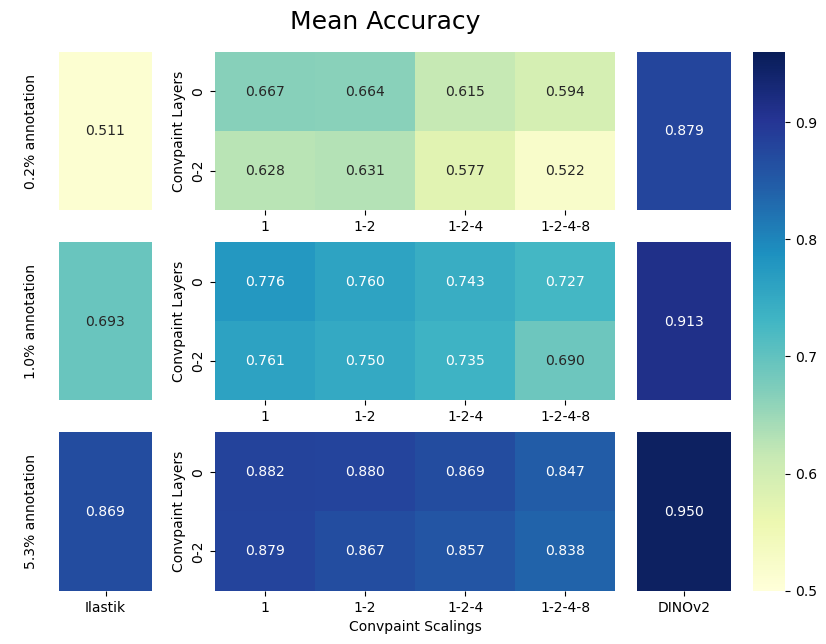

In [150]:
# With two models
# fig, ax = plt.subplot_mosaic([['upper left', 'upper mid', 'pad', 'right'],
#                               ['mid left', 'mid mid', 'pad', 'right'],
#                               ['lower left', 'lower mid', 'pad', 'right']],
#                               gridspec_kw={'width_ratios': [15, 3.5, 0.3, 1.2]})

# With three models
fig, ax = plt.subplot_mosaic([['pad left', 'upper left', 'pad', 'upper mid', 'upper right', 'right'],
                              ['pad left', 'mid left', 'pad', 'mid mid', 'mid right', 'right'],
                              ['pad left', 'lower left', 'pad', 'lower mid', 'lower right', 'right']],
                              gridspec_kw={'width_ratios': [1, 3.5, 0.7, 15, 3.5, 1.2]})

# Set parameters                        
for pad in ['pad left', 'pad']: ax[pad].axis('off')
fig.set_size_inches(10, 7)
fig.set_dpi(100)
fig.suptitle('Mean Accuracy', fontsize=18, y=0.94)
heatmap_cfg = {"annot":True, "cmap":"YlGnBu", "fmt":".3f", "cbar_ax":ax['right'], "vmin":0.5, "vmax":0.96}
# fig.tight_layout()

# CONVPAINT
ax_list_conv = [ax['upper mid'], ax['mid mid'], ax['lower mid']]#[ax['upper left'], ax['mid left'], ax['lower left']]
for i, df in enumerate(df_list_conv):
    row = ax_list_conv[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values='accuracy')
    sns.heatmap(heatmap_df_mean, cbar=i==0, ax=row, **heatmap_cfg)

    row.set_xlabel('Convpaint Scalings' if i == num_df - 1 else '')
    # row.set_yticks([])
    row.set_ylabel('Convpaint Layers')

    # row.set_tight_layout()
    # row.set_aspect('auto')

# ILASTIK
ax_list_ila = [ax['upper left'], ax['mid left'], ax['lower left']] #[ax['upper mid'], ax['mid mid'], ax['lower mid']]
for i, df in enumerate(df_list_ila):
    row = ax_list_ila[i]
    # Create a pivot table for heatmap, but only use the one value given for Ilastik
    heatmap_df_mean = df['accuracy'].mean().reshape((1,1))
    sns.heatmap(heatmap_df_mean, cbar=False, ax=row, **heatmap_cfg)

    if i == num_df - 1:
        row.set_xticklabels(["Ilastik"])
    else:
        row.set_xticks([])
    row.set_yticks([])
    row.text(-0.37, 0.5, f'{title_list[i]}% annotation', transform=row.transAxes, rotation=90, va='center')

# DINOv2
ax_list_dino = [ax['upper right'], ax['mid right'], ax['lower right']]
for i, df in enumerate(df_list_dino):
    row = ax_list_dino[i]
    # Create a pivot table for heatmap, but only use the one value given for Ilastik
    heatmap_df_mean = df['accuracy'].mean().reshape((1,1))
    sns.heatmap(heatmap_df_mean, cbar=False, ax=row, **heatmap_cfg)

    if i == num_df - 1:
        row.set_xticklabels(["DINOv2"])
    else:
        row.set_xticks([])
    row.set_yticks([])

# plt.savefig('results/pred07_avg_acc.pdf', dpi=300)